In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
class PoissonDistribution:
    def __init__(self, lam):
        self.lam = lam

    def pmf(self, k):
        return (self.lam ** k * np.exp(-self.lam)) / np.math.factorial(k)

    def cdf(self, x):
        return np.array([sum(self.pmf(k) for k in range(int(val) + 1)) for val in x])

def plot_pmf(x_values, pmf1, pmf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values, pmf1, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values, pmf2, basefmt=" ", linefmt="red", markerfmt="ro", label=label2)
    plt.title(title)
    plt.xlabel('Number of Events (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.step(x_values, cdf1, where="mid", label=label1, color='blue')
    plt.step(x_values, cdf2, where="mid", label=label2, color='red')
    plt.title(title)
    plt.xlabel('Number of Events (k)')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pmf_scipy, pmf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values, pmf_scipy, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values, pmf_custom, basefmt=" ", linefmt="orange", markerfmt="go", label=label2)
    plt.title(title)
    plt.xlabel('Number of Events (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two Poisson distributions
lambda1 = 3
lambda2 = 5

# Generate x values (possible number of events)
x_poisson_1 = np.arange(0, 15)
x_poisson_2 = np.arange(0, 15)

# Calculate PMF and CDF using scipy
pmf_poisson_1_scipy = poisson.pmf(x_poisson_1, lambda1)
pmf_poisson_2_scipy = poisson.pmf(x_poisson_2, lambda2)
cdf_poisson_1_scipy = poisson.cdf(x_poisson_1, lambda1)
cdf_poisson_2_scipy = poisson.cdf(x_poisson_2, lambda2)

# Create instances of PoissonDistribution
poisson_dist_1 = PoissonDistribution(lambda1)
poisson_dist_2 = PoissonDistribution(lambda2)

# Calculate PMF and CDF using custom class
pmf_poisson_1_custom = np.array([poisson_dist_1.pmf(k) for k in x_poisson_1])
pmf_poisson_2_custom = np.array([poisson_dist_2.pmf(k) for k in x_poisson_2])

cdf_poisson_1_custom = poisson_dist_1.cdf(x_poisson_1)
cdf_poisson_2_custom = poisson_dist_2.cdf(x_poisson_2)

/tmp/ipykernel_1425115/1903302891.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (self.lam ** k * np.exp(-self.lam)) / np.math.factorial(k)


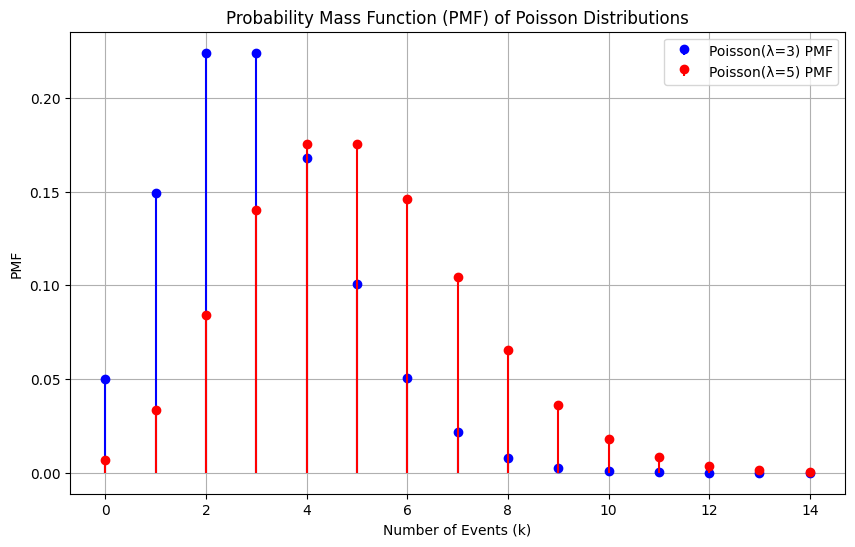

In [4]:
# Plot 1: PMF of Poisson Distributions (Original)
plot_pmf(x_poisson_1, pmf_poisson_1_scipy, pmf_poisson_2_scipy,
         label1=f'Poisson(λ={lambda1}) PMF', 
         label2=f'Poisson(λ={lambda2}) PMF',
         title='Probability Mass Function (PMF) of Poisson Distributions')

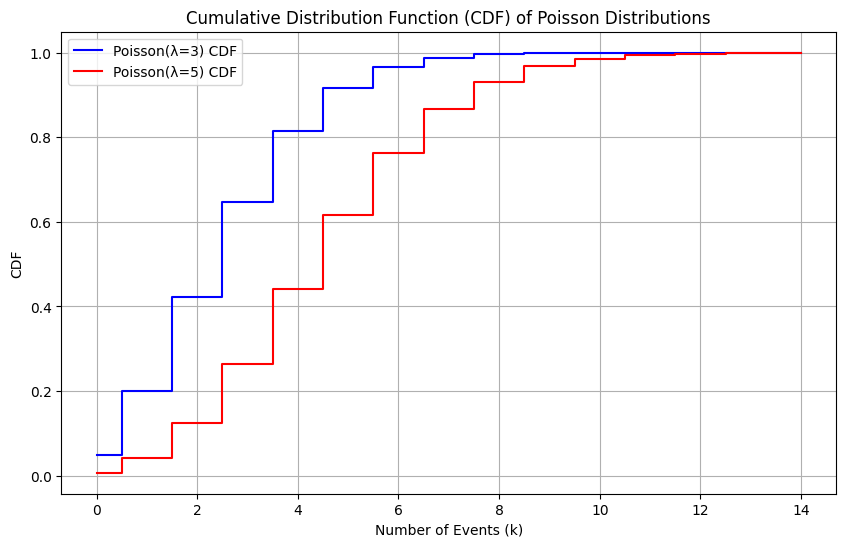

In [5]:
# Plot 2: CDF of Poisson Distributions (Original)
plot_cdf(x_poisson_1, cdf_poisson_1_scipy, cdf_poisson_2_scipy, 
         label1=f'Poisson(λ={lambda1}) CDF', 
         label2=f'Poisson(λ={lambda2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Poisson Distributions')

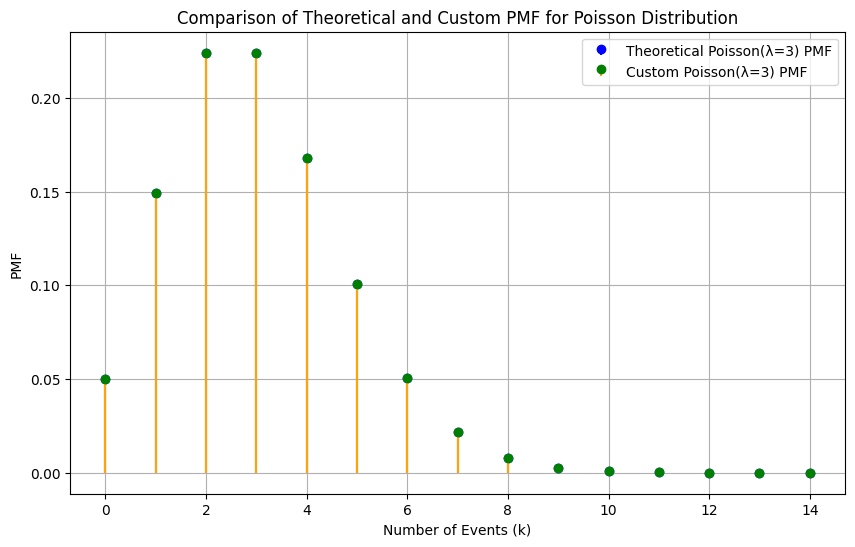

In [6]:
# Plot 3: Comparison of Theoretical and Custom PMFs
plot_comparison(x_poisson_1, pmf_poisson_1_scipy, pmf_poisson_1_custom, 
                label1=f'Theoretical Poisson(λ={lambda1}) PMF', 
                label2=f'Custom Poisson(λ={lambda1}) PMF', 
                title='Comparison of Theoretical and Custom PMF for Poisson Distribution')